In [ ]:
%pip install --upgrade chromadb

In [ ]:
%pip install matplotlib

In [2]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt

In [30]:
#chromaclient to interact with ChromaDB!
chroma_client = chromadb.PersistentClient(path="my_vectordb")

In [ ]:
%pip install pillow

In [ ]:
%pip install open-clip-torch

In [29]:
#Created an Imageloader 
image_loader = ImageLoader()

# Created an embedding functions by using OPENCLIPEmbedding
#it is used to convert our multimodal datas into their embedding numeric representation
multimodal_ef = OpenCLIPEmbeddingFunction()

# Created the vector database which works as a collection here
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db", embedding_function=multimodal_ef, data_loader=image_loader)

In [163]:
#adding images to the database, I added it manually, we can loop through the folder too
multimodal_db.add(
    ids=['0', '1','2','3','4','5','6','7','8','9'], 
    uris=['images/buildin.jpeg','images/glass1.jpeg','images/groupsd.jpeg','images/lady.jpg','images/manlaughing.jpg','images/tiger.jpg','images/worke.jpeg','images/man3.jpeg','images/girls2.png','images/frog.jpg'],
    metadatas=[{'img_category':'house'},{'img_category':'utensils'},{'img_category':'people'},{'img_category':'people'},{'img_category':'people'},{'img_category':'animals'},{'img_category':'people'}, {'img_category':'people'},{'img_category':'people'},{'img_category':'animals'},]
)

In [164]:
#to check the count of datas in database
multimodal_db.count()

10

In [165]:
# created a function to print the results of a query.

def print_query_results(query_list: list, query_results: dict)->None:
    result_count = len(query_results['ids'][0])

    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')

        for j in range(result_count):
            id       = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data     = query_results['data'][i][j]
            metadata = query_results['metadatas'][i][j]
            document = query_results['documents'][i][j]
            uri      = query_results['uris'][i][j]

            print(f'id: {id}, distance: {distance}, document: {document}') 
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off") #axis on or off at the image display
            plt.show()

Results for query: frog
id: 9, distance: 1.5909537310614525, document: None
data: images/frog.jpg


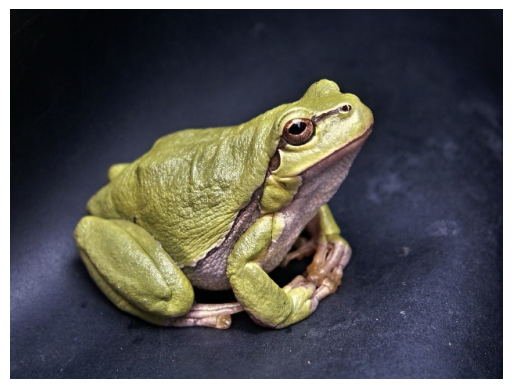

id: 5, distance: 1.7982932440786799, document: None
data: images/tiger.jpg


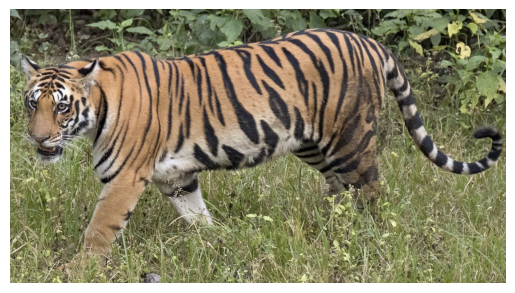

In [168]:
query_texts = ['frog']

query_results = multimodal_db.query(
    query_texts = query_texts,
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category':'animals'}
)

print_query_results(query_texts, query_results)

Results for query:  green tshirt
id: 9, distance: 1.2997625270435769, document: None
data: images/girls2.png


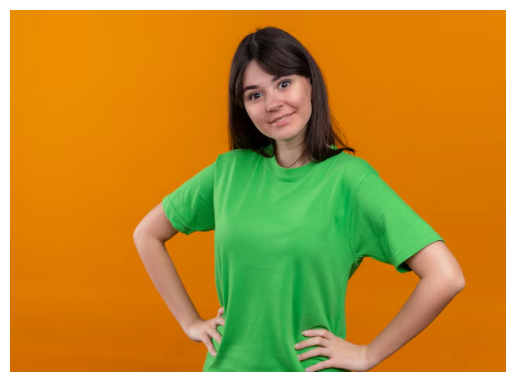

id: 2, distance: 1.702961648912717, document: None
data: images/groupsd.jpeg


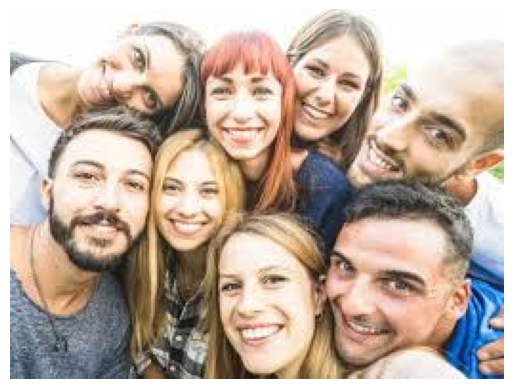

In [121]:
query_texts = [' green tshirt']

query_results = multimodal_db.query(
    query_texts = query_texts,
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'img_category':'people'}
)

print_query_results(query_texts, query_results)